In [1]:
import pandas as pd
import sqlite3
print("Notebook connected successfully!")


Notebook connected successfully!


In [2]:
# --- DataDeck: Steam Market Analytics System ---
# Setup and environment check

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Optional: make plots look cleaner
plt.style.use('ggplot')

print("Libraries loaded and ready!")


Libraries loaded and ready!


In [3]:
# Connect to your SQLite database
conn = sqlite3.connect("../data/datadeck.db")

# Check how many games are in the table
count = conn.execute("SELECT COUNT(*) FROM games;").fetchone()[0]
print(f"Connected to database — {count:,} games found.")


Connected to database — 27,075 games found.


In [4]:
# View a sample of the data
df_preview = pd.read_sql_query("SELECT * FROM games LIMIT 5;", conn)
df_preview


,appid,name,release_date,developer,publisher,platforms,required_age,categories,genres,positive_ratings,negative_ratings,price
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,124534,3339,7.19
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,3318,633,3.99
2,30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,3416,398,3.99
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,1273,267,3.99
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,5250,288,3.99


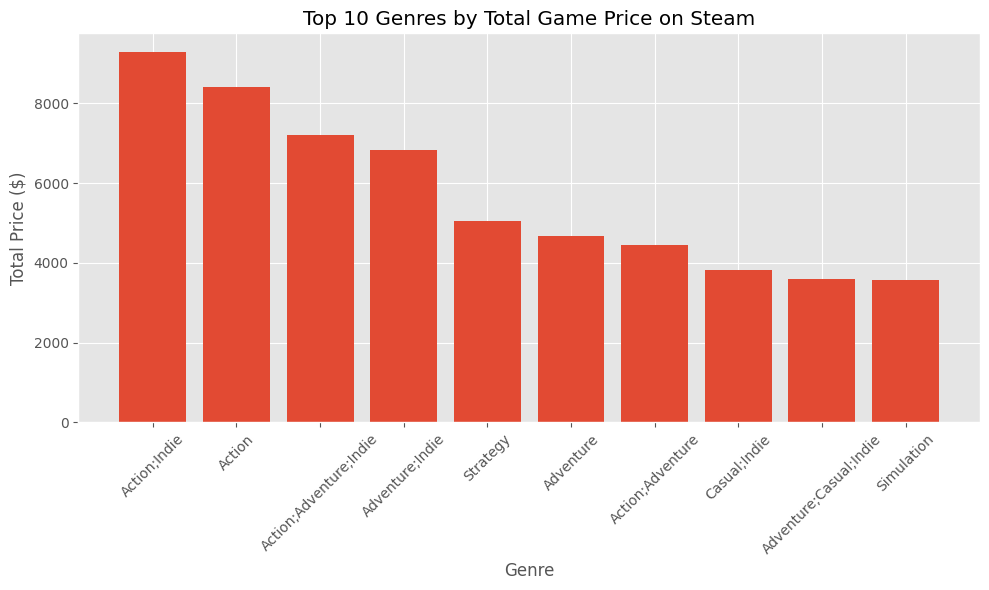

In [5]:
query = """
SELECT genres, ROUND(SUM(price), 2) AS total_revenue
FROM games
GROUP BY genres
ORDER BY total_revenue DESC
LIMIT 10;
"""
df_genres = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
plt.bar(df_genres['genres'], df_genres['total_revenue'])
plt.title("Top 10 Genres by Total Game Price on Steam")
plt.xlabel("Genre")
plt.ylabel("Total Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


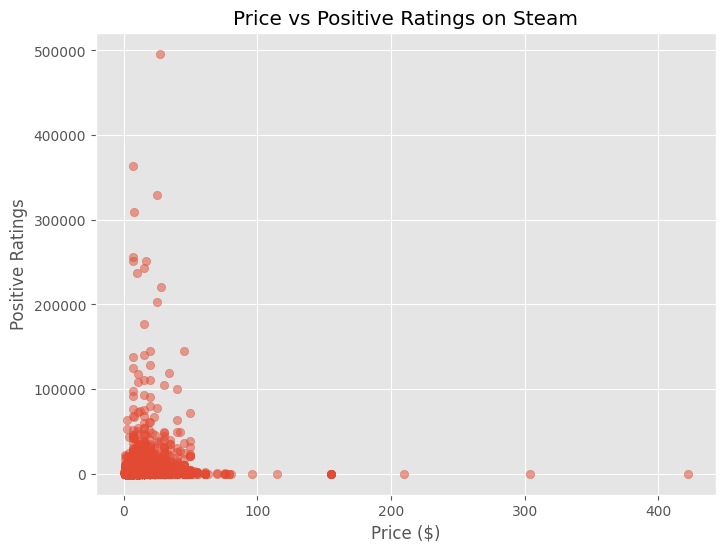

In [6]:
df_corr = pd.read_sql_query("""
SELECT price, positive_ratings
FROM games
WHERE price > 0 AND positive_ratings > 0;
""", conn)

plt.figure(figsize=(8,6))
plt.scatter(df_corr['price'], df_corr['positive_ratings'], alpha=0.5)
plt.title("Price vs Positive Ratings on Steam")
plt.xlabel("Price ($)")
plt.ylabel("Positive Ratings")
plt.show()


In [7]:
export_df = pd.read_sql_query("SELECT * FROM games;", conn)
export_df.to_csv("../data/cleaned/steam_for_tableau.csv", index=False)
print("Exported cleaned dataset for Tableau!")


Exported cleaned dataset for Tableau!


In [8]:
conn.close()
print("Database connection closed.")


Database connection closed.
